# LAB 03

# KNN design and implementation

**es1**

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv ("iris.csv", header = None)
# header=None parameter -- meaning that Pandas will expect to find a valid data point in the first row.
# If we do not specify this parameter, the default behavior for Pandas is to use the first column as the column names -- resulting in a dataset of 149 points, instead of 150.

In [2]:
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


**es2,es3**

In [3]:
df.values

array([[5.1, 3.5, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
       [4.7, 3.2, 1.3, 0.2, 'Iris-setosa'],
       [4.6, 3.1, 1.5, 0.2, 'Iris-setosa'],
       [5.0, 3.6, 1.4, 0.2, 'Iris-setosa'],
       [5.4, 3.9, 1.7, 0.4, 'Iris-setosa'],
       [4.6, 3.4, 1.4, 0.3, 'Iris-setosa'],
       [5.0, 3.4, 1.5, 0.2, 'Iris-setosa'],
       [4.4, 2.9, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.1, 1.5, 0.1, 'Iris-setosa'],
       [5.4, 3.7, 1.5, 0.2, 'Iris-setosa'],
       [4.8, 3.4, 1.6, 0.2, 'Iris-setosa'],
       [4.8, 3.0, 1.4, 0.1, 'Iris-setosa'],
       [4.3, 3.0, 1.1, 0.1, 'Iris-setosa'],
       [5.8, 4.0, 1.2, 0.2, 'Iris-setosa'],
       [5.7, 4.4, 1.5, 0.4, 'Iris-setosa'],
       [5.4, 3.9, 1.3, 0.4, 'Iris-setosa'],
       [5.1, 3.5, 1.4, 0.3, 'Iris-setosa'],
       [5.7, 3.8, 1.7, 0.3, 'Iris-setosa'],
       [5.1, 3.8, 1.5, 0.3, 'Iris-setosa'],
       [5.4, 3.4, 1.7, 0.2, 'Iris-setosa'],
       [5.1, 3.7, 1.5, 0.4, 'Iris-setosa'],
       [4.6, 3.6, 1.0, 0.2, 'Iri

In [4]:
X = df.values[:, :4].astype(float) # all rows (:), columns 0 -> 3 (:4)
y = df.values[:, 4] # all rows (:), 4th column (4)
X.shape, y.shape

((150, 4), (150,))

In [5]:
mask_True = [True] * 120 # 80% per il training set
mask_False = [False] * 30 # 20% per il test set
mask = np.array(mask_True + mask_False) # così ho una maschera con 150 valori
mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False,

In [6]:
np.random.shuffle(mask) # ora li mischio tutti per selezionare randomicamente i dati del train set e del test set
mask

array([False,  True,  True,  True, False, False,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True, False,  True,  True, False,  True,  True,
        True,  True,  True,  True, False,  True,  True, False,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True, False,  True,  True, False,  True,  True,
       False,  True,  True,  True,  True, False, False,  True,  True,
       False,  True,  True,  True, False, False,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True, False,

In [7]:
X_train = X[mask] # prendo l'80%
X_test = X[~mask] # prendo il restante 20%

y_train = y[mask] # prendo l'80%
y_test = y[~mask] # prenso il restante 20% usando la negazione della maschera
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((120, 4), (30, 4), (120,), (30,))

In [8]:
from collections import Counter
Counter(y_train), Counter(y_test)

(Counter({'Iris-versicolor': 41, 'Iris-setosa': 40, 'Iris-virginica': 39}),
 Counter({'Iris-virginica': 11, 'Iris-setosa': 10, 'Iris-versicolor': 9}))

**es4**

In [9]:
class KNearestNeighbors1:
    def __init__(self, k, distance_metric="euclidean"):
        self.k = k
        self.distance_metric = distance_metric
    
    def fit(self, X_train, y_train):
        """
        Store the 'prior knowledge ' of you model that will be used to predict new labels .
        : param X : input data points , ndarray , shape = (R,C).
        : param y : input labels , ndarray , shape = (R ,).
        """
        self.X_train = X_train
        self.y_train = y_train
    
    def predict(self, X_test):
        """
        Run the KNN classification on X.
        : param X: input data points , ndarray , shape = (N,C).
        : return : labels : ndarray , shape = (N ,).
        """
        pass

**es5**

*EUCLIDEAN DISTANCE*

In [10]:
def euclidean_non_numpy(p, q):
    cumul = 0
    for i in range(len(p)):
        cumul += (p[i] - q[i])**2
    return cumul ** 0.5
    
def euclidean_numpy(p, q): # molto più veloce rispetto al ciclo
    return ((p-q)**2).sum()**.5

In [11]:
X_train_reshaped = np.expand_dims(X_train, 1) # np.expand_dims(array, axis) aggiunge una nuova dimensione all’array lungo l’asse specificato.
X_train_reshaped.shape

(120, 1, 4)

In [12]:
X_diff = X_train_reshaped - X_test
X_diff.shape

(120, 30, 4)

In [13]:
dist_matrix = ((X_diff**2).sum(axis=2))**.5
# Sommi i quadrati lungo l’asse 2 (cioè lungo le feature), ottenendo la somma dei quadrati delle differenze per ciascuna coppia di punti.
# faccio la radice per ottenere la distanza euclidea
dist_matrix.shape

(120, 30)

In [14]:
i = 25
j = 14
dist_matrix[i,j], euclidean_numpy(X_train[i], X_test[j])
# controllo che la matrice che ho creato con le distanze abbia lo stesso valore del metodo della distanza euclidea fatta con numpy

(np.float64(3.802630668366309), np.float64(3.802630668366309))

In [15]:
# metodo da inserire nella classe per la distanza euclidea
def euclidean(X_train, X_test):
    X_train_reshaped = np.expand_dims(X_train, 1)
    X_diff = X_train_reshaped - X_test
    dist_matrix = ((X_diff**2).sum(axis=2))**.5
    return dist_matrix

euclidean(X_train, X_test).shape

(120, 30)

*COSINE DISTANCE*

In [16]:
dot_prods = X_train @ X_test.T # the @ operator is a short-hand for the matrix multiplication function
dot_prods.shape

(120, 30)

In [17]:
X_train_norm = ((X_train**2).sum(axis=1)**.5).reshape(-1,1) # Calcola la norma euclidea di ogni riga e la rende vettore colonna
X_test_norm = ((X_test**2).sum(axis=1)**.5).T # Calcola le norme dei vettori di test, ma .T non cambia nulla se è 1D

In [18]:
dist_matrix = 1 - abs(dot_prods / X_train_norm.reshape(-1,1) / X_test_norm)

In [19]:
# metodo da inseirire nella classe della cosine distance
def cosine(X_train, X_test):
    X_train_norm = ((X_train**2).sum(axis=1)**.5).reshape(-1,1)
    X_test_norm = ((X_test**2).sum(axis=1)**.5)
    dot_prods = X_train @ X_test.T 
    dist_matrix = 1 - abs(dot_prods / X_train_norm.reshape(-1,1) / X_test_norm)
    return dist_matrix

cosine(X_train, X_test).shape

(120, 30)

*MANHATTAN DISTANCE*

In [20]:
# metodo da inserire nella classe della manhattan distance
def manhattan(X_train, X_test):
    X_train_reshaped = np.expand_dims(X_train, 1)
    X_diff = X_train_reshaped - X_test
    dist_matrix = abs(X_diff).sum(axis=2) # come la euclidea ma faccio la differenza in valore assoluto 
    return dist_matrix

manhattan(X_train, X_test).shape

(120, 30)

In [21]:
class KNearestNeighbors2:
    def __init__(self, k, distance_metric="euclidean"):
        self.k = k
        self.distance_metric = distance_metric
    
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

        # sposto nella fit il reshape e la norma perchè vengono compiuti da tutti e tre le distanze
        # --> risparmio facendolo solo una volta
        self.X_train_reshaped = np.expand_dims(self.X_train, 1)
        self.X_train_norm = ((self.X_train**2).sum(axis=1)**.5).reshape(-1,1)

    def _euclidean(self, X_test): # euclidean distance
        X_diff = self.X_train_reshaped - X_test
        dist_matrix = ((X_diff**2).sum(axis=2))**.5
        return dist_matrix

    def _cosine(self, X_test): # cosine distance
        X_test_norm = ((X_test**2).sum(axis=1)**.5)
        dot_prods = X_train @ X_test.T 
        dist_matrix = 1 - abs(dot_prods / self.X_train_norm.reshape(-1,1) / X_test_norm)
        return dist_matrix

    def _manhattan(self, X_test): # manhattan distance
        X_diff = self.X_train_reshaped - X_test
        dist_matrix = abs(X_diff).sum(axis=2)
        return dist_matrix

    
    def predict(self, X_test):
        pass

**es6**

In [22]:
k = 3 # abbiamo deciso di prendere i tre più vicini
knn = dist_matrix.argsort(axis=0)[:k, :].T # prendiamo i top k training per tutti i test
# ordina indici di train per distanza (una riga(un punto) = top 3 più vicini a quel punto), prendi i primi k e trasponi
knn

array([[  6,   1,  38],
       [ 32,  38,  14],
       [  3,  14,  32],
       [ 28,   8,  15],
       [ 29,   4,  20],
       [  3,  14,  32],
       [ 22,  34,   7],
       [ 35,   0,  21],
       [ 28,   8,  15],
       [ 20,   4,  29],
       [ 67,  57,  76],
       [ 58,  48,  46],
       [ 78,  75,  52],
       [ 58, 112, 119],
       [ 49,  56,  64],
       [ 45,  52,  61],
       [ 73,  46,  75],
       [ 75,  73,  46],
       [ 41,  72,  75],
       [ 70,  92, 111],
       [115,  82, 102],
       [ 84,  95, 104],
       [ 98,  84,  95],
       [ 86, 116, 114],
       [119,  93,  86],
       [112,  87, 118],
       [113, 101,  87],
       [115,  82,  97],
       [113,  96, 118],
       [110,  86,  97]])

In [23]:
y_train[knn] # accediamo al training label associato

array([['Iris-setosa', 'Iris-setosa', 'Iris-setosa'],
       ['Iris-setosa', 'Iris-setosa', 'Iris-setosa'],
       ['Iris-setosa', 'Iris-setosa', 'Iris-setosa'],
       ['Iris-setosa', 'Iris-setosa', 'Iris-setosa'],
       ['Iris-setosa', 'Iris-setosa', 'Iris-setosa'],
       ['Iris-setosa', 'Iris-setosa', 'Iris-setosa'],
       ['Iris-setosa', 'Iris-setosa', 'Iris-setosa'],
       ['Iris-setosa', 'Iris-setosa', 'Iris-setosa'],
       ['Iris-setosa', 'Iris-setosa', 'Iris-setosa'],
       ['Iris-setosa', 'Iris-setosa', 'Iris-setosa'],
       ['Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor'],
       ['Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor'],
       ['Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor'],
       ['Iris-versicolor', 'Iris-virginica', 'Iris-virginica'],
       ['Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor'],
       ['Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor'],
       ['Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor'],


In [24]:
y_test[19] # ad esempio al punto 19 viene assegnata la classe virginica, 
# si può verificare guardando la matrice costruita con i 3 k più vicini che alla riga 19, la classe virgina prevale.

'Iris-virginica'

In [25]:
list(map(Counter, y_train[knn]))

[Counter({'Iris-setosa': 3}),
 Counter({'Iris-setosa': 3}),
 Counter({'Iris-setosa': 3}),
 Counter({'Iris-setosa': 3}),
 Counter({'Iris-setosa': 3}),
 Counter({'Iris-setosa': 3}),
 Counter({'Iris-setosa': 3}),
 Counter({'Iris-setosa': 3}),
 Counter({'Iris-setosa': 3}),
 Counter({'Iris-setosa': 3}),
 Counter({'Iris-versicolor': 3}),
 Counter({'Iris-versicolor': 3}),
 Counter({'Iris-versicolor': 3}),
 Counter({'Iris-virginica': 2, 'Iris-versicolor': 1}),
 Counter({'Iris-versicolor': 3}),
 Counter({'Iris-versicolor': 3}),
 Counter({'Iris-versicolor': 3}),
 Counter({'Iris-versicolor': 3}),
 Counter({'Iris-versicolor': 3}),
 Counter({'Iris-virginica': 2, 'Iris-versicolor': 1}),
 Counter({'Iris-virginica': 3}),
 Counter({'Iris-virginica': 3}),
 Counter({'Iris-virginica': 3}),
 Counter({'Iris-virginica': 3}),
 Counter({'Iris-virginica': 3}),
 Counter({'Iris-virginica': 3}),
 Counter({'Iris-virginica': 3}),
 Counter({'Iris-virginica': 3}),
 Counter({'Iris-virginica': 3}),
 Counter({'Iris-virgi

In [26]:
def majority_voting(votes): # per assegnare la classe devo prendere il top voto
    count = Counter(votes)
    return count.most_common(1)[0][0] # most_common(n) returns a list with the n most recurring votes (n=1 -> top vote)
    # we only need the first one [0][0]

np.array(list(map(majority_voting, y_train[knn])))
#np.array([majority_voting(y_train[knn][i]) for i in range(len(y_train[knn])) ])

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica'], dtype='<U15')

In [27]:
def _majority_voting(votes):
    count = Counter(votes)
    return count.most_common(1)[0][0] # most_common(n) returns a list with the n most recurring votes (n=1 -> top vote)

class KNearestNeighbors3:
    def __init__(self, k, distance_metric="euclidean"):
        self.k = k
        self.distance_metric = distance_metric
    
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        
        self.X_train_reshaped = np.expand_dims(self.X_train, 1)
        self.X_train_norm = ((self.X_train**2).sum(axis=1)**.5).reshape(-1,1)

    def _euclidean(self, X_test):
        X_diff = self.X_train_reshaped - X_test
        dist_matrix = ((X_diff**2).sum(axis=2))**.5
        return dist_matrix

    def _cosine(self, X_test):
        X_test_norm = ((X_test**2).sum(axis=1)**.5).T
        dot_prods = X_train @ X_test.T 
        dist_matrix = 1 - abs(dot_prods / self.X_train_norm.reshape(-1,1) / X_test_norm)
        return dist_matrix

    def _manhattan(self, X_test):
        X_diff = self.X_train_reshaped - X_test
        dist_matrix = abs(X_diff).sum(axis=2)
        return dist_matrix
    
    def predict(self, X_test):
        if self.distance_metric == "euclidean":
            dist_matrix = self._euclidean(X_test)
        elif self.distance_metric == "cosine":
            dist_matrix = self._cosine(X_test)
        elif self.distance_metric == "manhattan":
            dist_matrix = self._manhattan(X_test)
        else:
            raise Exception("Unknown distance metric")
            
        # Ordina gli indici dei punti di training per distanza crescente (per ogni punto test)
        # e prende i primi k (i più vicini)
        knn = dist_matrix.argsort(axis=0)[:self.k, :].T # # shape → (n_test, k)

        # Per ogni punto di test:
        # - prende le etichette dei suoi k vicini: self.y_train[knn][i]
        # - applica la funzione majority_voting() per decidere la classe predetta
        y_pred = np.array([ majority_voting(self.y_train[knn][i]) for i in range(len(self.y_train[knn]))])
        return y_pred # ritorna un array con le predizioni per tutti i punti di test

In [28]:
knn_model = KNearestNeighbors3(3, "euclidean")
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
y_pred

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica'], dtype='<U15')

**es7**

In [29]:
def accuracy_score(y_true, y_pred):
    return (y_true==y_pred).sum()/len(y_true) # conto quanti ne ho predetti correttamente rispetto alla size del test set 

In [30]:
accuracy_score(y_test, y_pred)

np.float64(1.0)

**es8**

In [31]:
from collections import defaultdict # inizializza dizionari con valori di default a zero

def _weighted_majority_voting(votes, weights):
    # we now compute `count` as a sum of weights
    # (no longer through Counter -- which effectively
    # weighted all votes as "1")
    count = defaultdict(lambda: 0)
    for vote, weight in zip(votes, weights):
        count[vote] += weight
    return max(count.items(), key=lambda x: x[1])[0] # return the max value (use a custom key extractor)

In [32]:
weights = 1/(np.take_along_axis(dist_matrix, knn.T, 0)+1e-5) # altrimenti la divisione per 0 farebbe casino, quindi aggiungo un piccolo valore a denominatore
[ _weighted_majority_voting(y_train[knn][i], weights[:, i]) for i in range(len(y_train[knn])) ]

['Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica']

In [33]:
np.take_along_axis(dist_matrix, knn.T, 0).max()

np.float64(0.0010961098998666374)

In [34]:
from collections import defaultdict

def _weighted_majority_voting(votes, weights):
    # we now compute `count` as a sum of weights
    # (no longer through Counter -- which effectively
    # weighted all votes as "1")
    count = defaultdict(lambda: 0)
    for vote, weight in zip(votes, weights):
        count[vote] += weight
    return max(count.items(), key=lambda x: x[1])[0] # return the max value (use a custom key extractor)


def _majority_voting(votes):
    count = Counter(votes)
    return count.most_common(1)[0][0] # most_common(n) returns a list with the n most recurring votes (n=1 -> top vote)

class KNearestNeighbors4:
    def __init__(self, k, distance_metric="euclidean", weights="uniform"):
        self.k = k
        self.distance_metric = distance_metric
        self.weights = weights
    
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        
        self.X_train_reshaped = np.expand_dims(self.X_train, 1)
        self.X_train_norm = ((self.X_train**2).sum(axis=1)**.5).reshape(-1,1)

    def _euclidean(self, X_test):
        X_diff = self.X_train_reshaped - X_test
        dist_matrix = ((X_diff**2).sum(axis=2))**.5
        return dist_matrix

    def _cosine(self, X_test):
        X_test_norm = ((X_test**2).sum(axis=1)**.5).T
        dot_prods = X_train @ X_test.T 
        dist_matrix = 1 - abs(dot_prods / self.X_train_norm.reshape(-1,1) / X_test_norm)
        return dist_matrix

    def _manhattan(self, X_test):
        X_diff = self.X_train_reshaped - X_test
        dist_matrix = abs(X_diff).sum(axis=2)
        return dist_matrix
    
    def predict(self, X_test):
        if self.distance_metric == "euclidean":
            dist_matrix = self._euclidean(X_test)
        elif self.distance_metric == "cosine":
            dist_matrix = self._cosine(X_test)
        elif self.distance_metric == "manhattan":
            dist_matrix = self._manhattan(X_test)
        else:
            raise Exception("Unknown distance metric")
        
        knn = dist_matrix.argsort(axis=0)[:self.k, :].T
        if self.weights == "uniform":
            y_pred = np.array([ majority_voting(self.y_train[knn][i]) for i in range(len(self.y_train[knn])) ])
        elif self.weights == "distance":
            weights = 1/(np.take_along_axis(dist_matrix, knn.T, 0)+1e-5)
            y_pred = np.array([ _weighted_majority_voting(y_train[knn][i], weights[:, i]) for i in range(len(y_train[knn])) ])
        return y_pred

In [35]:
knn_model = KNearestNeighbors4(3, "euclidean", "distance")
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
accuracy_score(y_test, y_pred)

np.float64(1.0)

In [36]:
list(y_test).count(Counter(y_train).most_common(1)[0][0]) / len(y_test)

0.3

In [37]:
knn_model = KNearestNeighbors4(120, "euclidean", "uniform")
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
accuracy_score(y_test, y_pred)

np.float64(0.3)

In [38]:
knn_model = KNearestNeighbors4(120, "euclidean", "distance")
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
accuracy_score(y_test, y_pred)

np.float64(1.0)

**es9**

In [39]:
df = pd.read_csv("mnist_test.csv", header=None)
X = df.values[:, 1:].astype(float) # all cols but the first one (784 cols in this case)
y = df.values[:, 0] # first column, with the label info

# here, we use vstack and hstack to stack (vertical and horizontally, respectively)
# different arrays/lists.
X_100 = np.vstack([ X[y==d][:100] for d in range(10) ])
y_100 = np.hstack([ [d]*100 for d in range(10) ])

# generalized version of the previous code (generates 80/20 split)
mask = np.array([True] * int(len(X_100)*.8) + [False] * (len(X_100)-int(len(X_100)*.8)))
np.random.shuffle(mask)

X_train = X_100[mask]
X_test = X_100[~mask]

y_train = y_100[mask]
y_test = y_100[~mask]
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((800, 784), (200, 784), (800,), (200,))

In [40]:
knn_model = KNearestNeighbors4(5, "euclidean", "uniform")
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
accuracy_score(y_test, y_pred)

np.float64(0.87)

In [41]:
knn_model = KNearestNeighbors4(800, "euclidean", "uniform")
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
print("uniform", accuracy_score(y_test, y_pred))

knn_model = KNearestNeighbors4(800, "euclidean", "distance")
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
print("distance", accuracy_score(y_test, y_pred))

uniform 0.07
distance 0.525


**es10**

In [42]:
accuracies = []
# stiamo provando diverse configurazioni dei paramentri
# in questo caso proviamo valori di k da 3 a 104 con step 10
k_values = list(range(3, 104, 10))
for k in k_values:
    knn_model = KNearestNeighbors4(k, "euclidean", "distance")
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(k, accuracy) # stampo l'accuratezza per ogni k scelto

3 0.88
13 0.855
23 0.815
33 0.775
43 0.755
53 0.76
63 0.755
73 0.75
83 0.745
93 0.73
103 0.73


Text(0, 0.5, 'Accuracy')

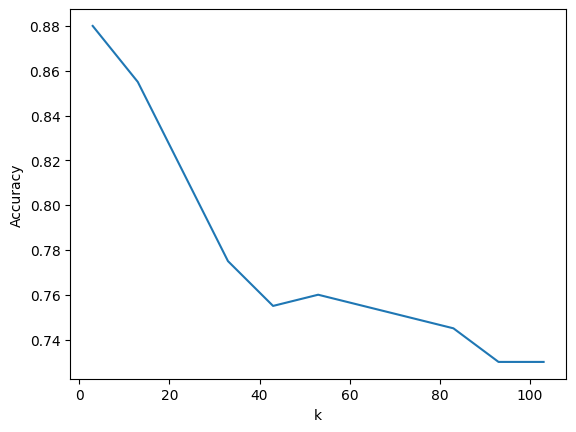

In [43]:
import matplotlib.pyplot as plt
# plotto il risultato per vedere meglio 
# con k grandi accuratezza scende
%matplotlib inline
plt.plot(k_values, accuracies)
plt.xlabel("k")
plt.ylabel("Accuracy")

2 0.875
3 0.88
4 0.9
5 0.88
6 0.89
7 0.88
8 0.89
9 0.87
10 0.85
11 0.855
12 0.855
13 0.855
14 0.845


Text(0, 0.5, 'Accuracy')

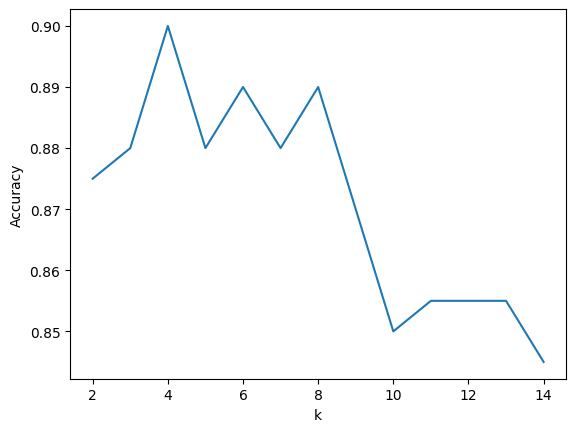

In [44]:
accuracies = []
# provo con un altro range di k, prendo valori da 2 a 15 con step 1
k_values = list(range(2, 15))
for k in k_values:
    knn_model = KNearestNeighbors4(k, "euclidean", "distance")
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(k, accuracy)

plt.plot(k_values, accuracies)
plt.xlabel("k")
plt.ylabel("Accuracy")
# stampo e plotto l'accuracy per ogni k, sta volta saranno in un range più piccolo

(0.5, 1.0)

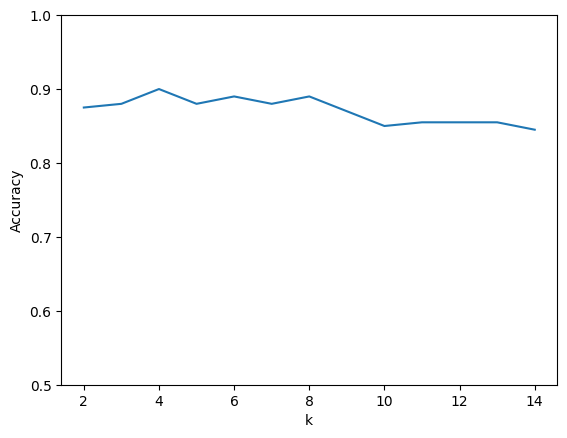

In [45]:
plt.plot(k_values, accuracies)
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.ylim(0.5,1) # se allargo la scala sulle y si vede molto di più che le accuracy sono molto ravvicinate

In [46]:
# simile alla GRID SEARCH dove provo tutte le combinazioni per valutare quali sono i parametri migliori
for k in range(2, 7): # per i k che vanno da 2 a 7 (quelli che abbiamo valutato migliori prima)
    for weights in ["uniform", "distance"]: # per ogni tipologia di voto majority vote e weigheted majoity vote
        for distance in [ "euclidean", "manhattan", "cosine"]: # per ogni tipologia di distanza calcolata tra i punti
            knn_model = KNearestNeighbors4(k, distance, weights)
            knn_model.fit(X_train, y_train)
            y_pred = knn_model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            print(accuracy, k, weights, distance)

0.875 2 uniform euclidean
0.885 2 uniform manhattan
0.87 2 uniform cosine
0.875 2 distance euclidean
0.885 2 distance manhattan
0.87 2 distance cosine
0.88 3 uniform euclidean
0.865 3 uniform manhattan
0.88 3 uniform cosine
0.88 3 distance euclidean
0.865 3 distance manhattan
0.88 3 distance cosine
0.89 4 uniform euclidean
0.885 4 uniform manhattan
0.895 4 uniform cosine
0.9 4 distance euclidean
0.885 4 distance manhattan
0.9 4 distance cosine
0.87 5 uniform euclidean
0.88 5 uniform manhattan
0.905 5 uniform cosine
0.88 5 distance euclidean
0.88 5 distance manhattan
0.91 5 distance cosine
0.885 6 uniform euclidean
0.87 6 uniform manhattan
0.895 6 uniform cosine
0.89 6 distance euclidean
0.875 6 distance manhattan
0.895 6 distance cosine


**es11**

In [47]:
df = pd.read_csv("AmesHousing.csv")
y = np.array(df["House Style"]) # target

In [48]:
df = df.select_dtypes(include=np.number) # seleziono solo le feature numeriche

In [49]:
df.fillna(df.mean(axis=0), inplace=True) # sostistuisco i valori mancanti con il valore medio della colonna direttamente sul df originale

In [50]:
X = df.values
# creo la mask 80% train e 20% test
mask = np.array([True] * int(len(X)*0.8) + [False] * (len(X) - int(len(X)*0.8)))
np.random.shuffle(mask)

X_train = X[mask]
X_test = X[~mask] # nego la maschera

y_train = y[mask]
y_test = y[~mask]
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((2344, 39), (586, 39), (2344,), (586,))

**es12**

In [51]:
knn_model = KNearestNeighbors4(5, "euclidean", "uniform")
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
accuracy_score(y_test, y_pred)

np.float64(0.5989761092150171)

In [52]:
unique, counts = np.unique(y_test, return_counts=True)
random_guess = counts.max() / len(y_test)
print("random guess", random_guess)

random guess 0.5136518771331058


**es13**

In [53]:
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train_scaled = (X_train - mean) / std
X_test_scaled = (X_test - mean) / std

In [54]:
knn_model = KNearestNeighbors4(5, "euclidean", "uniform")
knn_model.fit(X_train_scaled, y_train)
y_pred = knn_model.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

np.float64(0.8447098976109215)

**es14**

In [55]:
neighs = range(1, 20) # provo vicini da 1 a 20
perf_uniform = np.empty(len(neighs)) # faccio array vuoto dove inserisco poi le accuracy per ogni k

for i, n_neigh in enumerate(neighs):
    knn_model = KNearestNeighbors4(n_neigh, "euclidean", "uniform")
    knn_model.fit(X_train_scaled, y_train)
    perf_uniform[i] = accuracy_score(y_test, knn_model.predict(X_test_scaled))

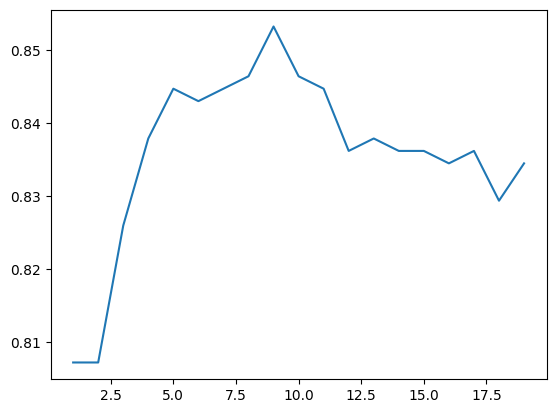

In [56]:
# plotto il risultato
fig, ax = plt.subplots()
ax.plot(neighs, perf_uniform)

**es15**

In [57]:
n_runs = 20 # quante volte riprovo le combinazioni di train e test set
neighs = range(1, 20) # quanti vicini considero per il knn

# create an array to save all single results
perf = np.empty((n_runs, len(neighs)))

for run in range(n_runs):
    # create a new train/test split
    np.random.shuffle(mask)
    X_train = X[mask]
    X_test = X[~mask]
    y_train = y[mask]
    y_test = y[~mask]

    # scale the feature values
    mean = np.mean(X_train, axis=0)
    std = np.std(X_train, axis=0)
    X_train_scaled = (X_train - mean) / std
    X_test_scaled = (X_test - mean) / std

    # run the classifier multiple times and store the result of each run
    for i, n_neigh in enumerate(neighs):
        knn_model = KNearestNeighbors4(n_neigh, "euclidean", "uniform")
        knn_model.fit(X_train_scaled, y_train)
        perf[run, i] = accuracy_score(y_test, knn_model.predict(X_test_scaled))

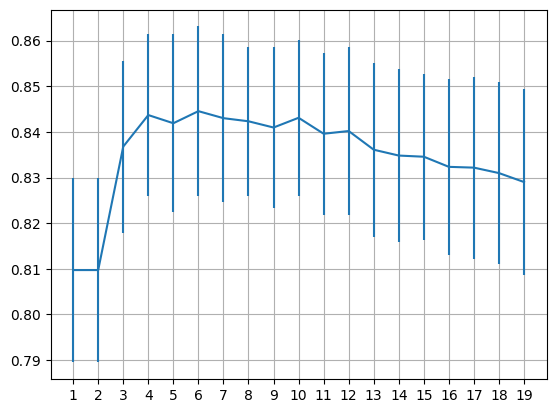

In [58]:
fig, ax = plt.subplots()

ax.errorbar(neighs, perf.mean(axis=0), perf.std(axis=0))
ax.set_xticks(neighs);
ax.grid()

**es16**

In [59]:
neighs = range(1, 20)
metrics = ["euclidean", "manhattan"]

perf = np.empty((len(neighs), len(metrics)))

np.random.shuffle(mask)
X_train = X[mask]
X_test = X[~mask]
y_train = y[mask]
y_test = y[~mask]

mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train_scaled = (X_train - mean) / std
X_test_scaled = (X_test - mean) / std

for i, n_neigh in enumerate(neighs):
    for j, metric in enumerate(metrics):
        knn_model = KNearestNeighbors4(n_neigh, metric, "uniform")
        knn_model.fit(X_train_scaled, y_train)
        perf[i, j] = accuracy_score(y_test, knn_model.predict(X_test_scaled))

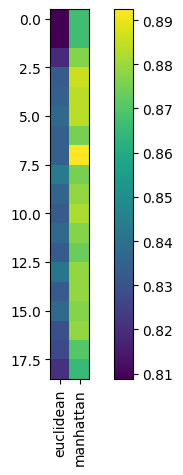

In [60]:
fig, ax = plt.subplots()
cm = ax.imshow(perf)
ax.set_xticks(range(len(metrics)))
ax.set_xticklabels(metrics, rotation=90)
fig.colorbar(cm)